# Importing Libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [126]:
train = pd.read_csv(r'../input/jobathon-march-2022/train_PDjVQMB.csv')
test = pd.read_csv(r'../input/jobathon-march-2022/test_lTY72QC.csv')
sub = pd.read_csv(r'../input/jobathon-march-2022/sample_OoSmYo5.csv')

In [127]:
train.shape, test.shape, sub.shape

((6650, 11), (2851, 10), (2851, 2))

In [128]:
train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [129]:
train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)

In [130]:
train.nunique()

Age                     52
Gender                   2
Income                   4
Balance               6643
Vintage                  6
Transaction_Status       2
Product_Holdings         3
Credit_Card              2
Credit_Category          3
Is_Churn                 2
dtype: int64

In [131]:
train.dtypes

Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

In [132]:
train.isnull().sum()

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [133]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


# EDA

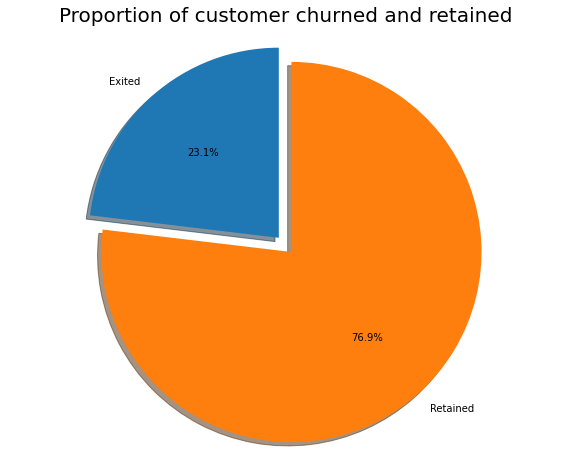

In [134]:
labels = 'Exited', 'Retained'
sizes = [train.Is_Churn[train['Is_Churn']==1].count(), train.Is_Churn[train['Is_Churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<AxesSubplot:xlabel='Credit_Card', ylabel='count'>

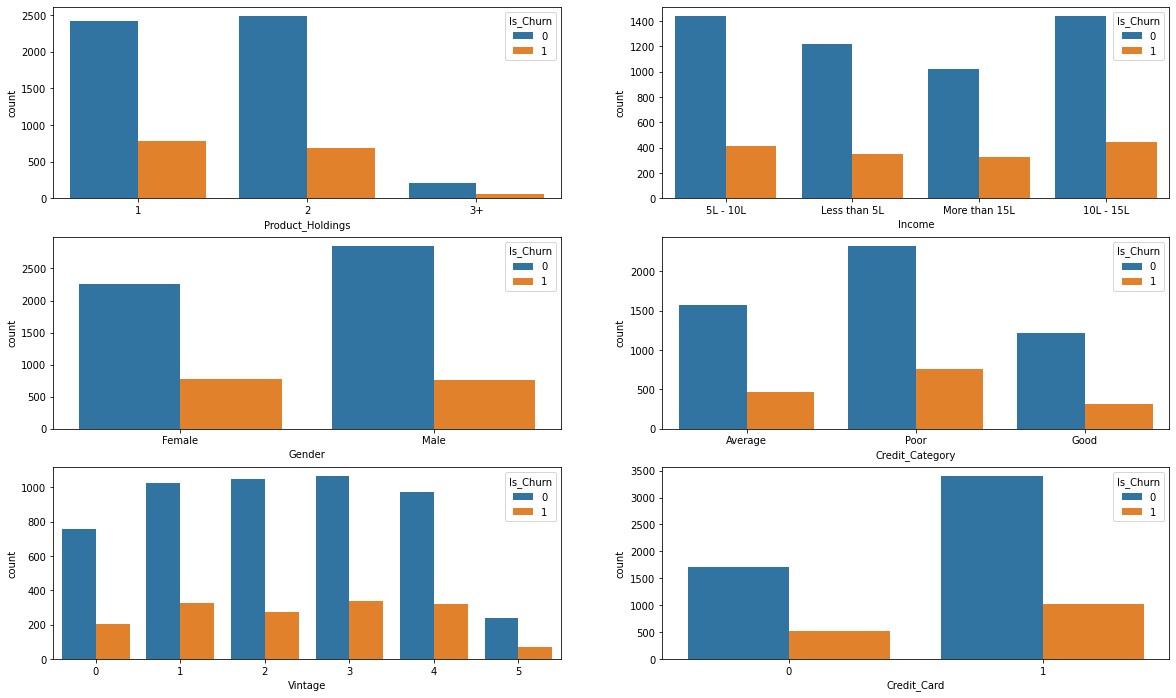

In [135]:
# Relations based on the categorical variables
#['Product_Holdings','Income','Gender','Credit_Category']
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.countplot(x='Product_Holdings', hue = 'Is_Churn',data = train, ax=axarr[0][0])
sns.countplot(x='Income', hue = 'Is_Churn',data = train, ax=axarr[0][1])
sns.countplot(x='Gender', hue = 'Is_Churn',data = train, ax=axarr[1][0])
sns.countplot(x='Credit_Category', hue = "Is_Churn",data = train, ax=axarr[1][1])
sns.countplot(x='Vintage', hue = 'Is_Churn',data = train, ax=axarr[2][0])
sns.countplot(x='Credit_Card', hue = "Is_Churn",data = train, ax=axarr[2][1])

In [136]:
def Age_encoding(age):
    if (age<30):
        return 0
    elif age<40 and age>30:
        return 1
    elif age<50 and age>40:
        return 2
    elif age<60 and age>50:
        return 3
    else:
        return 4

In [137]:
def balance_encoding(age):
    if (age<100000):
        return 0
    elif age<500000 and age>100000:
        return 1
    elif age<1000000 and age>500000:
        return 2
    elif age<1500000 and age>1000000:
        return 3
    else:
        return 4

In [138]:
train['balance_encoding']=train['Balance'].apply(balance_encoding)

In [139]:
train['Age_encoding']=train['Age'].apply(Age_encoding)

<AxesSubplot:xlabel='Age_encoding', ylabel='count'>

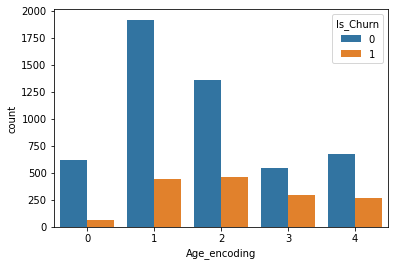

In [140]:
sns.countplot(x='Age_encoding', hue = 'Is_Churn',data = train)

<AxesSubplot:xlabel='balance_encoding', ylabel='count'>

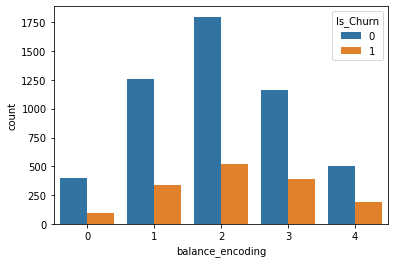

In [141]:
sns.countplot(x='balance_encoding', hue = 'Is_Churn',data = train)

In [142]:
def decode_income(income):
    if (income=="10L - 15L"):
        return 1250000
    elif(income=="5L - 10L"):
        return 750000
    elif(income=="Less than 5L"):
        return 250000
    else:
        return 2000000
    

In [143]:
train['income_decoding']=train['Income'].apply(decode_income)

(-1.0, 5.0)

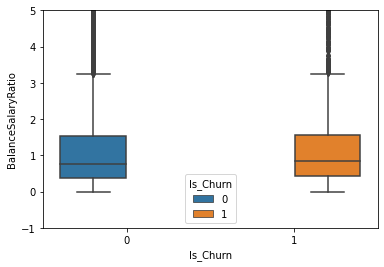

In [144]:
train['BalanceSalaryRatio'] = train.Balance/train.income_decoding
sns.boxplot(y='BalanceSalaryRatio',x = 'Is_Churn', hue = 'Is_Churn',data = train)
plt.ylim(-1, 5)

In [145]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,balance_encoding,Age_encoding,income_decoding,BalanceSalaryRatio
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1,2,1,750000,0.751022
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0,2,3,250000,3.502288
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0,2,1,2000000,0.350804
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,3,2,2000000,0.696961
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1,2,1,2000000,0.446573


In [146]:
test['balance_encoding']=test['Balance'].apply(balance_encoding)
test['Age_encoding']=test['Age'].apply(Age_encoding)
test['income_decoding']=test['Income'].apply(decode_income)
test['BalanceSalaryRatio'] = test.Balance/test.income_decoding

# Insights
1. Customers who have deposited less products are more likely to churn.
2. Customers who are having poor credit score are more likely to churn.
3. No relation between males and females genders and their churning .
4. Customers are more likely to churn after 1 st year of getting banks service.
5. Customers who chosen credit card are more likely to churn.
6. customers whose age greater than 30 and less than 50 are more likely to churn 
7.Customers whose balance is in range of 5-10 lakhs are most likely to churn

# Feature Engineering

In [147]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var = ['Product_Holdings','Income','Gender','Credit_Category']
for i in var:
    train[i] = le.fit_transform(train[i])
    test[i] = le.transform(test[i])

In [148]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,balance_encoding,Age_encoding,income_decoding,BalanceSalaryRatio
0,36,0,1,563266.44,4,0,0,0,0,1,2,1,750000,0.751022
1,53,0,2,875572.11,2,1,0,1,2,0,2,3,250000,3.502288
2,35,0,3,701607.06,2,1,1,0,2,0,2,1,2000000,0.350804
3,43,0,3,1393922.16,0,1,1,1,2,1,3,2,2000000,0.696961
4,39,0,3,893146.23,1,1,0,1,1,1,2,1,2000000,0.446573


In [149]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6650.0,4.113023e+01,9.685747,21.00000,34.000000,40.000000,4.700000e+01,7.200000e+01
Gender,6650.0,5.431579e-01,0.498171,0.00000,0.000000,1.000000,1.000000e+00,1.000000e+00
Income,6650.0,1.357594e+00,1.096052,0.00000,0.000000,1.000000,2.000000e+00,3.000000e+00
Balance,6650.0,8.045954e+05,515754.867315,63.00000,392264.212500,764938.575000,1.147124e+06,2.436616e+06
Vintage,6650.0,2.250226e+00,1.458795,0.00000,1.000000,2.000000,3.000000e+00,5.000000e+00
Transaction_Status,6650.0,5.157895e-01,0.499788,0.00000,0.000000,1.000000,1.000000e+00,1.000000e+00
Product_Holdings,6650.0,5.590977e-01,0.571977,0.00000,0.000000,1.000000,1.000000e+00,2.000000e+00
Credit_Card,6650.0,6.643609e-01,0.472249,0.00000,0.000000,1.000000,1.000000e+00,1.000000e+00
Credit_Category,6650.0,1.155338e+00,0.863572,0.00000,0.000000,1.000000,2.000000e+00,2.000000e+00
Is_Churn,6650.0,2.311278e-01,0.421586,0.00000,0.000000,0.000000,0.000000e+00,1.000000e+00


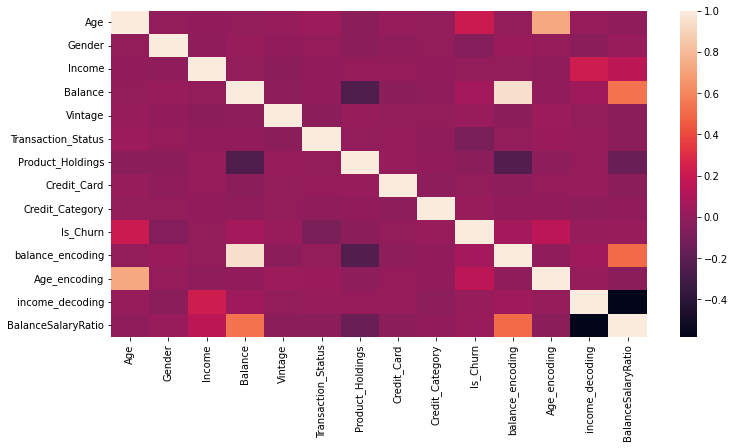

In [150]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr())
plt.show()

In [151]:
train=train.drop(['Balance','income_decoding','Age'], axis=1) 

In [152]:
train.head()

,Gender,Income,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,balance_encoding,Age_encoding,BalanceSalaryRatio
0,0,1,4,0,0,0,0,1,2,1,0.751022
1,0,2,2,1,0,1,2,0,2,3,3.502288
2,0,3,2,1,1,0,2,0,2,1,0.350804
3,0,3,0,1,1,1,2,1,3,2,0.696961
4,0,3,1,1,0,1,1,1,2,1,0.446573


# Training Model

In [153]:
from sklearn.model_selection import train_test_split
X = train.drop(['Is_Churn'], axis=1) #features (independent variables)
y = train['Is_Churn'] #target (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Ridge Classifier

In [154]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier()

In [155]:
pred_ridge = clf_ridge.predict(X_train)
accuracy_score(y_train, pred_ridge)

0.7704887218045112

In [156]:
pred_test_ridge = clf_ridge.predict(X_test)
accuracy_score(y_test, pred_test_ridge)

0.762406015037594

In [157]:
from sklearn.metrics import f1_score
f1_score(y_test,pred_test_ridge, average='macro')

0.4325938566552901

In [158]:
print(classification_report(y_test,pred_test_ridge))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      1014
           1       0.00      0.00      0.00       316

    accuracy                           0.76      1330
   macro avg       0.38      0.50      0.43      1330
weighted avg       0.58      0.76      0.66      1330



# Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [160]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8109022556390978

In [161]:
pred_test_rf = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test_rf)

0.7616541353383459

In [162]:
from sklearn.metrics import f1_score
f1_score(y_test,pred_test_rf, average='macro')

0.4641588472062826

In [163]:
print(classification_report(y_test,pred_test_rf))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      1014
           1       0.48      0.03      0.06       316

    accuracy                           0.76      1330
   macro avg       0.62      0.51      0.46      1330
weighted avg       0.70      0.76      0.67      1330



# Gridsearch RF

In [164]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [165]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [166]:
print("Best params",clf.best_params_)
print("Best params",clf.best_score_)

Best params {'max_depth': 15, 'n_estimators': 300}
Best params 0.7514285714285714


In [167]:
pred = clf.predict(X_train)
accuracy_score(y_train, pred)

0.9738721804511278

In [168]:
pred_test_grf = clf.predict(X_test)
accuracy_score(y_test, pred_test_grf)

0.9842105263157894

In [169]:
from sklearn.metrics import f1_score
f1_score(y_test,pred_test_grf, average='macro')

0.9776906063314585

In [170]:
print(classification_report(y_test,pred_test_grf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1014
           1       1.00      0.93      0.97       316

    accuracy                           0.98      1330
   macro avg       0.99      0.97      0.98      1330
weighted avg       0.98      0.98      0.98      1330



# XGB

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [172]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)


In [173]:
XGB.fit(X, y)

[11:55:45] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:55:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.01, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=5, missing=None,
              monotone_constraints='()', n_estimators=20, n_jobs=1, nthread=1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [174]:
pred_xgb = clf.predict(X_train)
accuracy_score(y_train, pred_xgb)

0.9738721804511278

In [175]:
pred_test_xgb = clf.predict(X_test)
accuracy_score(y_test, pred_test_xgb)

0.9842105263157894

In [176]:
from sklearn.metrics import f1_score
f1_score(y_test,pred_test_xgb, average='macro')

0.9776906063314585

In [177]:
print(classification_report(y_test,pred_test_xgb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1014
           1       1.00      0.93      0.97       316

    accuracy                           0.98      1330
   macro avg       0.99      0.97      0.98      1330
weighted avg       0.98      0.98      0.98      1330



# Logistic Regression

In [178]:
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 50, 100],
                         'fit_intercept': [True], 'intercept_scaling': [1],
                         'max_iter': [250], 'penalty': ['l2'],
                         'tol': [1e-05, 0.0001, 1e-06]})

In [179]:
pred_lr = log_primal_Grid.predict(X_train)
accuracy_score(y_train, pred_xgb)

0.9738721804511278

In [180]:
pred_test_lr = log_primal_Grid.predict(X_test)
accuracy_score(y_test, pred_test_lr)

0.7609022556390977

In [181]:
from sklearn.metrics import f1_score
f1_score(y_test,pred_test_lr, average='macro')

0.43517628205128206

In [182]:
print(classification_report(y_test,pred_test_lr))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1014
           1       0.25      0.00      0.01       316

    accuracy                           0.76      1330
   macro avg       0.51      0.50      0.44      1330
weighted avg       0.64      0.76      0.66      1330



# Choosing Best Model

# Checking on test data

In [184]:
test.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,balance_encoding,Age_encoding,income_decoding,BalanceSalaryRatio
0,50,0,3,1008636.39,2,1,1,1,0,3,4,2000000,0.504318
1,36,1,1,341460.72,2,0,1,1,0,1,1,750000,0.455281
2,25,0,0,439460.10,0,0,1,1,1,1,0,1250000,0.351568
3,41,1,2,28581.93,0,1,1,1,2,0,2,250000,0.114328
4,48,1,3,1104540.03,2,1,2,0,1,3,2,2000000,0.552270


In [185]:
test=test.drop(['Balance','income_decoding','Age'], axis=1) 

In [186]:
test.head()

,Gender,Income,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,balance_encoding,Age_encoding,BalanceSalaryRatio
0,0,3,2,1,1,1,0,3,4,0.504318
1,1,1,2,0,1,1,0,1,1,0.455281
2,0,0,0,0,1,1,1,1,0,0.351568
3,1,2,0,1,1,1,2,0,2,0.114328
4,1,3,2,1,2,0,1,3,2,0.552270


In [ ]:
# test['Balance'] = test['Balance'].round(decimals = 2)

In [187]:
churn_xgb = clf.predict(test)
# churn_rf_pred =clf_forest.predict(test)
# churn_grf_pred = clf.predict(test)

In [188]:
test['churn_xgb'] = churn_xgb
# test['churn_rf'] = churn_rf_pred
# test['churn_grf'] = churn_grf_pred

In [189]:
test_data=pd.read_csv(r'../input/jobathon-march-2022/test_lTY72QC.csv')

In [190]:
sub = pd.DataFrame()
sub['ID']=test_data['ID']
sub['Is_Churn']=test['churn_xgb']

In [191]:
sub

,ID,Is_Churn
0,55480787,0
1,9aededf2,0
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0
...,...,...
2846,19e40adf,1
2847,52d5bc8d,0
2848,f708121b,0
2849,f008715d,0


In [192]:
sub.to_csv("xgb.csv",index=False)

In [194]:
set(sub['ID']) - set(test_data['ID'])

set()